<a href="https://colab.research.google.com/github/veapasichnyk/Codveda-Internship-/blob/main/Task_3_Implement_K_Nearest_Neighbors_(KNN)_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Task 3: Implement K-Nearest Neighbors (KNN) Classifier

##Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Load data

In [3]:
df = pd.read_csv("Sentiment dataset.csv")

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
print(df.shape)
print(df.info())

(732, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


Perfect! I can train a KNN model to classify Sentiment based on the post Text.

##Data preprocessing

In [6]:
# Keep only text + sentiment
df = df[['Text', 'Sentiment']].dropna()

In [13]:
# Filter to top 10 most common sentiment classes
top_10 = df['Sentiment'].value_counts().nlargest(10).index
df = df[df['Sentiment'].isin(top_10)].copy()

In [14]:
# Encode target
le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])

In [15]:
# Text vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Text'])

In [16]:
print(df['Sentiment'].value_counts())

Sentiment
Positive        44
Joy             42
Excitement      32
Contentment     14
Neutral         14
Happy           14
Sad              9
Hopeful          9
Gratitude        9
Curiosity        8
Name: count, dtype: int64


In [17]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##KNeighborsClassifier

In [19]:
# Try different K values
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0)

    print(f"\n=== K = {k} ===")
    print(f"Accuracy: {acc:.3f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)


=== K = 1 ===
Accuracy: 0.564
Confusion Matrix:
 [[0 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 1 0 2 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 1 0 0 0 4 1 2 0]
 [0 0 0 0 0 0 0 2 1 0]
 [0 0 0 0 0 0 0 1 8 0]
 [0 0 0 0 0 0 0 0 1 1]]
Classification Report:
                precision    recall  f1-score   support

 Contentment        0.00      0.00      0.00         3
   Curiosity        0.00      0.00      0.00         1
  Excitement        0.50      0.50      0.50         6
   Gratitude        1.00      1.00      1.00         2
       Happy        0.50      0.33      0.40         3
     Hopeful        0.50      0.50      0.50         2
         Joy        0.67      0.50      0.57         8
     Neutral        0.50      0.67      0.57         3
   Positive         0.50      0.89      0.64         9
         Sad        1.00      0.50      0.67         2

     accuracy                           0.56        39
    macro avg       0.52      0.4

##Plot Accuracy vs K

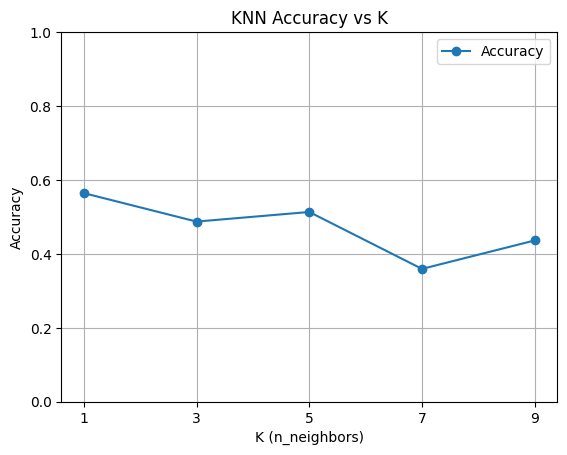

In [21]:
k_values = [1, 3, 5, 7, 9]
accuracy = [0.564, 0.487, 0.513, 0.359, 0.436]

plt.plot(k_values, accuracy, marker='o', label='Accuracy')
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.grid(True)
plt.xticks(k_values)
plt.ylim(0, 1)
plt.legend()
plt.show()

K=1 is optimal for your data right now - despite slight overfitting risk.

Larger K values (like 7 or 9) smooth the decision boundary too much for this problem (too many classes, not enough separation in TF-IDF space).

The small dataset per class (2–9 examples) makes KNN very sensitive to K.